In [20]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from skimage import transform, io

In [5]:
glob.glob("../web_scraper/images/skin_care/*")

['../web_scraper/images/skin_care/Photoderm-Anti-Age-SPF-30_Bioderma.jpg',
 '../web_scraper/images/skin_care/Take-It-Away-Total-Makeup-Remover_Estee-Lauder.jpg',
 '../web_scraper/images/skin_care/Rose-Face-Mask_fresh.jpg',
 '../web_scraper/images/skin_care/Genifique-Youth-Activating-Cream-Serum_Lancome.jpg',
 '../web_scraper/images/skin_care/C-Tango-Multivitamin-Eye-Cream_Drunk-Elephant.jpg',
 '../web_scraper/images/skin_care/Blue-Lizard-Australian-Sunscreen-SPF-30+-Chemical-Free-Fragrance-Free-Sensitive_Blue-Lizard.jpg',
 '../web_scraper/images/skin_care/Gentle-Foaming-Cleanser_Peter-Thomas-Roth.jpg',
 '../web_scraper/images/skin_care/Intensive-Skin-Supplement_Bobbi-Brown.jpg',
 '../web_scraper/images/skin_care/Regenerist-Luminous-Light-Hydrating-Face-Lotion_Olay.jpg',
 '../web_scraper/images/skin_care/Merlot-Friction-Scrub_Caudalie-Paris.jpg',
 '../web_scraper/images/skin_care/FirmaTone-Rx-Retinol-Maximum-Chin-and-Neck-Firming-Serum_Dr.-Denese-New-York.jpg',
 '../web_scraper/images/s

In [35]:
skin_care_df = pd.read_csv('../web_scraper/skin_care_products.csv')
skin_care_df.head()

,product_links,product_names,product_category,brand,ingredient,size,price,claims,image_path
0,https://www.beautypedia.com/products/clear-com...,Clear Complexion Spot Treatment,Acne & Blemish Treatment,Merle Norman,"Active: Salicylic Acid (2%), Other: Alcohol D...",0.50 fl. oz.,20.00,"Fast-drying, on-the-spot solution with Salicyl...",images/skin_care/Fresh-Pressed-Daily-Booster-w...
1,https://www.beautypedia.com/products/acne-solu...,Acne Solutions Emergency Gel Lotion,Acne & Blemish Treatment,Clinique,"Active: Benzoyl Peroxide (5%), Other: Water P...",0.50 fl. oz.,17.00,Clinique's medicated troubleshooter with benzo...,images/skin_care/Fresh-Pressed-Daily-Booster-w...
2,https://www.beautypedia.com/products/resist-da...,RESIST Daily Pore-Refining Solution 2% BHA,Acne & Blemish Treatment,Paula's Choice Skincare,"Water (Aqua), Dipropylene Glycol, Salicylic ...",3.00 fl. oz.,33.00,This daily-use liquid exfoliant is ideal for t...,images/skin_care/Fresh-Pressed-Daily-Booster-w...
3,https://www.beautypedia.com/products/max-compl...,Max Complexion Correction Pads,Acne & Blemish Treatment,Peter Thomas Roth,"Active: Salicylic Acid (2%), Other: Alcohol D...",60.00,40.00,Regulates healthy cell turnover and delivers p...,images/skin_care/Fresh-Pressed-Daily-Booster-w...
4,https://www.beautypedia.com/products/naturals-...,Naturals Acne Spot Treatment,Acne & Blemish Treatment,Neutrogena,Active Ingredient: Salicylic Acid 1%. Inactive...,0.75 fl. oz.,8.49,Clinically proven acne medicine treats and hel...,images/skin_care/Fresh-Pressed-Daily-Booster-w...


In [32]:
sample_path = skin_care_df['image_path'].iloc[8]
sample_path

'images/skin_care/Fresh-Pressed-Daily-Booster-with-Pure-Vitamin-C-10%_Clinique.jpg'

In [54]:
sample_path = "../web_scraper/images/skin_care/Le-Blanc-Brightening-Moisture-Lotion_Chanel.jpg"
sample_path

'../web_scraper/images/skin_care/Le-Blanc-Brightening-Moisture-Lotion_Chanel.jpg'

In [55]:
sample = io.imread(sample_path)

In [56]:
sample.shape

(25, 112)

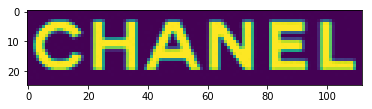

In [57]:
plt.imshow(sample)

In [64]:
def make_square(image):
    h, w, c = image.shape[0], image.shape[1], 3
    if h==w:
        return image
    
    size = int(max(h,w))
    new_image = np.zeros([size,size,c])
    h0 = int((size-h)/2)
    w0 = int((size-w)/2)
    new_image[h0:h0+h, w0:w0+w, :] = image
    new_image = new_image.astype(image.dtype)
    return new_image

In [65]:
sample_square = make_square(sample)
plt.imshow(sample_square)

ValueError: could not broadcast input array from shape (25,112) into shape (25,112,3)

In [60]:
sample_resized = transform.resize(sample_square,(128,128))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


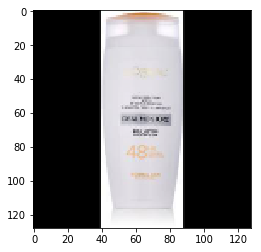

In [53]:
plt.imshow(sample_resized)